# Datenauswertung Kompotoi Team A

### Last modified: Pascal Berger, 17.04.2021

## Read data from sigfox api


Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [100]:
# packages import
import requests
import json
import pandas as pd
import numpy as np

from matplotlib import *


In [226]:
# helper function
def make_sorter(l):
    """
    Create a dict from the list to map to 0..len(l)
    Returns a mapper to map a series to this custom sort order
    """
    sort_order = {k:v for k,v in zip(l, range(len(l)))}
    return lambda s: s.map(lambda x: sort_order[x])

Login to api

In [101]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [102]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,608715c53312286fcc8f39ad.d0c322a2295b498550172...


get devices data

In [103]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

# payload = json.dumps([
#   {
#     "data": [],
#     "count": 2,
#     "meta": {}
#   }
# ])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers)
#print(devices_response.text)


In [104]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,1F2504E,60476e95362d421c28ee0058,"B1 (PTH-04E, ex. Türe Beschl.)",simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '608710813312286fcc8eec85', 'keys': [...",[],[],"{'_id': '608710813312286fcc8eec85', 'keys': [{...",NaN
1,1F25047,60476e95362d421c28ee0058,"B2 (PTH-047, ex. Riegel Besch)",simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '608711b2595b6e15229f993e', 'keys': [...",[],[],"{'_id': '608711b2595b6e15229f993e', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
2,2203AFA,60476e95362d421c28ee0058,"M1 (POC-AFA, ex. Türe Mag. a)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '6086fbd0595b6e15229e4dbc', 'keys': [...",[],[],"{'_id': '6086fbd0595b6e15229e4dbc', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AF9,60476e95362d421c28ee0058,M2 (POC-AF9),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '6086bf66595b6e15229a4e68', 'keys': [...",[],[],"{'_id': '6086bf66595b6e15229a4e68', 'keys': [{...",NaN
4,2203ACB,60476e95362d421c28ee0058,"M3 (POC-ACB, ex. Riegel Mag.)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '60871236595b6e15229fa202', 'keys': [...",[],[],"{'_id': '60871236595b6e15229fa202', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."
5,2203AAB,60476e95362d421c28ee0058,"M4 (POC-AAB, ex. Türe Mag. in)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '608675a0600a891442caefb9', 'keys': [...",[],[],"{'_id': '608675a0600a891442caefb9', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."


---
## Read sensor data to dataframe

In [105]:
%%time
message_data_combined = pd.DataFrame()

for deviceid in device_data['id'].items():
  deviceid = deviceid[1]
  url = "https://www.iofrog.com/api/v2/devices/" + deviceid + "/messages?timestampFrom=1616601600&limit=5000"

  # payload = json.dumps({
  #   "data": [
  #     {
  #       "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
  #       "isAlarm": False,
  #       "isDismissed": False,
  #       "timestamp": 1584093653,
  #       "type": "data_uplink",
  #       "seqNumber": 1,
  #       "keys": [
  #         {
  #           "isCode": False,
  #           "_id": "1111111111111111111111",
  #           "key": "key",
  #           "value": "value",
  #           "keyLocale": "Klíč",
  #           "valueLocale": "Hodnota",
  #           "color": "alarm",
  #           "icon": "icon name (from fontAwesome)"
  #         }
  #       ]
  #     }
  #   ],
  #   "count": 1
  # })
  headers = {
    'Authorization': 'Bearer ' + access_token,
    'Content-Type': 'application/json',
    'Cookie': ''
  }
  message_response = requests.request("GET", url, headers=headers)
  # print(response.text)
  message_dict = json.loads(message_response.text)
  # json response to dataframe
  if 'code' in message_dict:
    print("Error reading sensor messages from device: " + deviceid)
    print(message_dict)
  else:
    message_data = pd.DataFrame.from_dict(message_dict['data'])
    message_data = message_data.drop(columns=['keys'])
    message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
    message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
    message_data_keys.reset_index(inplace=True)
    message_data_keys = message_data_keys.groupby('_id').sum()
    #print(message_data_keys)
    # join df's
    message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)
    message_data_combined = pd.concat([message_data_combined, message_data])

message_data_combined

Wall time: 15.3 s


,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,dl_with_timestamp,...,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge,counter,resetDetail
0,608710813312286fcc8eec85,1619464320,data_bidir,549.0,1F2504E,2021-04-26T19:12:01.181Z,0,orientation_changed,0,0,...,16,992,1008,992,-16,0,-16,both,NaN,NaN
1,6087103c595b6e15229f8276,1619464251,data_bidir,548.0,1F2504E,2021-04-26T19:10:52.487Z,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
2,60870dbf3312286fcc8ec1c8,1619463614,data_bidir,547.0,1F2504E,2021-04-26T19:00:15.490Z,0,orientation_changed,0,0,...,-32,1008,1008,992,-16,80,-32,both,NaN,NaN
3,60870d7a3312286fcc8ebcb6,1619463546,data_bidir,546.0,1F2504E,2021-04-26T18:59:06.964Z,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
4,60870932595b6e15229f1739,1619462450,data_bidir,545.0,1F2504E,2021-04-26T18:40:50.937Z,0,orientation_changed,0,0,...,16,1008,1008,992,-16,0,-32,both,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6080151e2ec2c31293d6e2e1,1619006749,data_bidir,127.0,2203AAB,2021-04-21T12:05:50.673Z,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0
4996,608015162ec2c31293d6e151,1619006740,data_bidir,126.0,2203AAB,2021-04-21T12:05:42.070Z,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0
4997,6080150dc021c13f66d21516,1619006732,data_bidir,125.0,2203AAB,2021-04-21T12:05:33.496Z,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0
4998,608015042ec2c31293d6dfb9,1619006724,data_bidir,124.0,2203AAB,2021-04-21T12:05:24.869Z,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054,0


## Datatype conversions, remove of unused columns

In [251]:
message_data_combined['created'] = pd.to_datetime(message_data_combined['created'])
# not needed later
message_data_combined['timestamp'] = pd.to_datetime(message_data_combined['timestamp'])

print(type(message_data_combined.iloc[0,0]))
message_data_combined

KeyError: 'timestamp'

### Convert int to float values

In [107]:
message_data_combined['counter'] = pd.to_numeric(message_data_combined['counter'])
message_data_combined

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,dl_with_timestamp,...,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge,counter,resetDetail
0,608710813312286fcc8eec85,1970-01-01 00:00:01.619464320,data_bidir,549.0,1F2504E,2021-04-26 19:12:01.181000+00:00,0,orientation_changed,0,0,...,16,992,1008,992,-16,0,-16,both,NaN,NaN
1,6087103c595b6e15229f8276,1970-01-01 00:00:01.619464251,data_bidir,548.0,1F2504E,2021-04-26 19:10:52.487000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
2,60870dbf3312286fcc8ec1c8,1970-01-01 00:00:01.619463614,data_bidir,547.0,1F2504E,2021-04-26 19:00:15.490000+00:00,0,orientation_changed,0,0,...,-32,1008,1008,992,-16,80,-32,both,NaN,NaN
3,60870d7a3312286fcc8ebcb6,1970-01-01 00:00:01.619463546,data_bidir,546.0,1F2504E,2021-04-26 18:59:06.964000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,both,NaN,NaN
4,60870932595b6e15229f1739,1970-01-01 00:00:01.619462450,data_bidir,545.0,1F2504E,2021-04-26 18:40:50.937000+00:00,0,orientation_changed,0,0,...,16,1008,1008,992,-16,0,-32,both,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6080151e2ec2c31293d6e2e1,1970-01-01 00:00:01.619006749,data_bidir,127.0,2203AAB,2021-04-21 12:05:50.673000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054.0,0
4996,608015162ec2c31293d6e151,1970-01-01 00:00:01.619006740,data_bidir,126.0,2203AAB,2021-04-21 12:05:42.070000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054.0,0
4997,6080150dc021c13f66d21516,1970-01-01 00:00:01.619006732,data_bidir,125.0,2203AAB,2021-04-21 12:05:33.496000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054.0,0
4998,608015042ec2c31293d6dfb9,1970-01-01 00:00:01.619006724,data_bidir,124.0,2203AAB,2021-04-21 12:05:24.869000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,1054.0,0


### Check and remove unused columns

In [108]:
print(message_data_combined.columns)

Index(['_id', 'timestamp', 'type', 'seqNumber', 'deviceId', 'created', '__v',
       'action', 'battery', 'dl_with_timestamp', 'firmware', 'humidity',
       'hw_config_accelerometer_type', 'hw_config_has_beeper',
       'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led',
       'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi',
       'hw_config_temp_type', 'light_on', 'mode', 'reed_on', 'temperature',
       'version', 'x_fin', 'x_max', 'x_min', 'y_fin', 'y_max', 'y_min',
       'z_fin', 'z_max', 'z_min', '_merge', 'counter', 'resetDetail'],
      dtype='object')


In [109]:
print(message_data_combined['__v'].value_counts())
print(message_data_combined['hw_config_accelerometer_type'].value_counts())
print(message_data_combined['hw_config_has_beeper'].value_counts())
print(message_data_combined['hw_config_has_leakage'].value_counts())
print(message_data_combined['type'].value_counts())
print(message_data_combined['version'].value_counts())
print(message_data_combined['_merge'].value_counts())
print(message_data_combined['dl_with_timestamp'].value_counts())
# humidity is not working, always 0 or false
print(message_data_combined['humidity'].value_counts())
print(message_data_combined['light_on'].value_counts())
print(message_data_combined['reed_on'].value_counts())

print(message_data_combined['firmware'].value_counts())
# check if we need service informations -> not really, drop
message_data_combined.loc[message_data_combined['firmware'] == '1.0', 'firmware':'dl_with_timestamp'].head(1)


0    8539
Name: __v, dtype: int64
0           8530
LIS2DH12       9
Name: hw_config_accelerometer_type, dtype: int64
0        8530
false       9
Name: hw_config_has_beeper, dtype: int64
0        8530
false       9
Name: hw_config_has_leakage, dtype: int64
data_bidir     8520
service_ack      19
Name: type, dtype: int64
0    8530
6       9
Name: version, dtype: int64
both          8539
left_only        0
right_only       0
Name: _merge, dtype: int64
0        487
false      2
Name: dl_with_timestamp, dtype: int64
0     487
56      2
Name: humidity, dtype: int64
0        487
false      2
Name: light_on, dtype: int64
0        487
false      2
Name: reed_on, dtype: int64
0      8530
1.0       9
Name: firmware, dtype: int64


""
471


### 

In [110]:
# test, if we can gather informations from xyz values -> not really
print(message_data_combined['x_min'].value_counts().head())
print(message_data_combined['x_fin'].value_counts().head())
print(message_data_combined['x_max'].value_counts().head())
print(message_data_combined['y_min'].value_counts().head())
print(message_data_combined['y_max'].value_counts().head())
print(message_data_combined['z_min'].value_counts().head())
print(message_data_combined['z_max'].value_counts().head())

0      1466
896     218
912     124
-32     102
16      101
Name: x_min, dtype: int64
0      1466
912     532
16      112
896      91
32       81
Name: x_fin, dtype: int64
0      1466
928     278
912     205
32      146
0        93
Name: x_max, dtype: int64
0      1466
432     404
992     136
416     115
960      93
Name: y_min, dtype: int64
0       1466
448      308
1008     196
976      152
992       93
Name: y_max, dtype: int64
0      1466
16      232
0       214
-16     117
-32      88
Name: z_min, dtype: int64
0     1466
32     226
48     187
0      164
16     110
Name: z_max, dtype: int64


### drop columns

In [111]:
# to check for problems set: errors='raise', otherwise errors='ignore'
message_data_combined.drop(columns=['_id', 'timestamp', 'type', 'seqNumber', '__v', 'firmware', 'hw_config_accelerometer_type', 'hw_config_has_beeper', 'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led', 'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi', 'hw_config_temp_type', 'version', '_merge', 'dl_with_timestamp', 'humidity', 'light_on', 'reed_on'], inplace=True, errors='ignore') 

message_data_combined.drop(columns=['x_min', 'x_fin', 'x_max', 'y_min', 'y_fin', 'y_max', 'z_min', 'z_fin', 'z_max'], inplace=True, errors='ignore')


message_data_combined

,deviceId,created,action,battery,mode,temperature,counter,resetDetail
0,1F2504E,2021-04-26 19:12:01.181000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
1,1F2504E,2021-04-26 19:10:52.487000+00:00,first_move,0,put_me_back,0,NaN,NaN
2,1F2504E,2021-04-26 19:00:15.490000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
3,1F2504E,2021-04-26 18:59:06.964000+00:00,first_move,0,put_me_back,0,NaN,NaN
4,1F2504E,2021-04-26 18:40:50.937000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
...,...,...,...,...,...,...,...,...
4995,2203AAB,2021-04-21 12:05:50.673000+00:00,reed_counter,0,reed_counter,0,1054.0,0
4996,2203AAB,2021-04-21 12:05:42.070000+00:00,reed_counter,0,reed_counter,0,1054.0,0
4997,2203AAB,2021-04-21 12:05:33.496000+00:00,reed_counter,0,reed_counter,0,1054.0,0
4998,2203AAB,2021-04-21 12:05:24.869000+00:00,reed_counter,0,reed_counter,0,1054.0,0


### Sort datframe by sensorId and then by ascending creation timestamp

In [112]:
message_data_combined.sort_values(by=['deviceId', 'created'], inplace = True)
message_data_combined.reset_index(drop=True, inplace=True)
message_data_combined

,deviceId,created,action,battery,mode,temperature,counter,resetDetail
0,1F25047,2021-03-24 16:09:10.882000+00:00,first_move,0,put_me_back,0,NaN,NaN
1,1F25047,2021-03-24 16:10:03.512000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
2,1F25047,2021-03-24 16:10:19.624000+00:00,first_move,0,put_me_back,0,NaN,NaN
3,1F25047,2021-03-24 16:11:24.607000+00:00,orientation_changed,0,put_me_back,0,NaN,NaN
4,1F25047,2021-03-24 16:21:12.376000+00:00,end_of_orientation_alarm,0,put_me_back,0,NaN,NaN
...,...,...,...,...,...,...,...,...
8534,2203AFA,2021-04-25 17:32:51.587000+00:00,heartbeat_1,3,reed_counter,22,NaN,NaN
8535,2203AFA,2021-04-26 01:35:43.850000+00:00,heartbeat_2,3,reed_counter,11,NaN,NaN
8536,2203AFA,2021-04-26 09:40:41.055000+00:00,heartbeat_2,3,reed_counter,15.5,NaN,NaN
8537,2203AFA,2021-04-26 17:42:52.587000+00:00,heartbeat_2,3,reed_counter,19.5,NaN,NaN


### Fill counter values for non tilt sensors

In [113]:
print(message_data_combined['mode'].value_counts())
print(message_data_combined['action'].value_counts().head(7))
# use action = 'orientation_changed' as counter index as it has the most values
for deviceId in message_data_combined['deviceId'].unique():
    message_data_combined.loc[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId), 'counter'] = (list(message_data_combined[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId)].reset_index().index))

# message_data_combined['counter'] = np.cumsum(message_data_combined['counter'])
message_data_combined[message_data_combined['action'] == 'orientation_changed']

reed_counter    5807
put_me_back     2514
press_me         199
0                 19
Name: mode, dtype: int64
reed_counter                5483
orientation_changed         1071
first_move                  1013
heartbeat_1                  478
heartbeat_2                  187
end_of_orientation_alarm     123
orientation_alarm            123
Name: action, dtype: int64


,deviceId,created,action,battery,mode,temperature,counter,resetDetail
1,1F25047,2021-03-24 16:10:03.512000+00:00,orientation_changed,0,put_me_back,0,0.0,NaN
3,1F25047,2021-03-24 16:11:24.607000+00:00,orientation_changed,0,put_me_back,0,1.0,NaN
7,1F25047,2021-03-24 16:24:28.338000+00:00,orientation_changed,0,put_me_back,0,2.0,NaN
9,1F25047,2021-03-24 16:41:07.753000+00:00,orientation_changed,0,put_me_back,0,3.0,NaN
11,1F25047,2021-03-24 17:06:50.172000+00:00,orientation_changed,0,put_me_back,0,4.0,NaN
...,...,...,...,...,...,...,...,...
2528,1F2504E,2021-04-26 18:01:10.949000+00:00,orientation_changed,0,put_me_back,0,195.0,NaN
2530,1F2504E,2021-04-26 18:19:48.818000+00:00,orientation_changed,0,put_me_back,0,196.0,NaN
2532,1F2504E,2021-04-26 18:40:50.937000+00:00,orientation_changed,0,put_me_back,0,197.0,NaN
2534,1F2504E,2021-04-26 19:00:15.490000+00:00,orientation_changed,0,put_me_back,0,198.0,NaN


In [114]:
# check if the strucure look ok
for deviceId in message_data_combined['deviceId'].unique():
    print(message_data_combined.loc[message_data_combined['deviceId'] == deviceId, ['deviceId', 'mode', 'created', 'counter']].head())

  deviceId         mode                          created  counter
0  1F25047  put_me_back 2021-03-24 16:09:10.882000+00:00      NaN
1  1F25047  put_me_back 2021-03-24 16:10:03.512000+00:00      0.0
2  1F25047  put_me_back 2021-03-24 16:10:19.624000+00:00      NaN
3  1F25047  put_me_back 2021-03-24 16:11:24.607000+00:00      1.0
4  1F25047  put_me_back 2021-03-24 16:21:12.376000+00:00      NaN
     deviceId      mode                          created  counter
2048  1F2504E  press_me 2021-03-25 08:45:25.628000+00:00      NaN
2049  1F2504E  press_me 2021-03-26 09:18:57.557000+00:00      NaN
2050  1F2504E  press_me 2021-03-27 09:50:29.340000+00:00      NaN
2051  1F2504E  press_me 2021-03-28 10:27:56.461000+00:00      NaN
2052  1F2504E  press_me 2021-03-29 11:02:14.920000+00:00      NaN
     deviceId          mode                          created  counter
2537  2203AAB  reed_counter 2021-04-21 12:05:16.253000+00:00   1054.0
2538  2203AAB  reed_counter 2021-04-21 12:05:24.869000+00:00   1054.

### Pivot data for each sensor

In [218]:
message_data_wide = message_data_combined.pivot(index=['created'], columns='deviceId', values='counter').reset_index().add_prefix('counter_')
message_data_wide.rename(columns={'counter_created':'created', 'counter_deviceId':'deviceId'}, inplace = True)
# divide AAB / 2 because door is opened twice per usage
message_data_wide['counter_2203AAB'] = message_data_wide['counter_2203AAB'] / 2

message_data_wide.columns.name = None

message_data_wide

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA
0,2021-03-24 16:09:10.882000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-24 16:09:49.988000+00:00,NaN,NaN,NaN,57.0,NaN,NaN
2,2021-03-24 16:10:03.512000+00:00,0.0,NaN,NaN,NaN,NaN,NaN
3,2021-03-24 16:10:19.624000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-24 16:11:24.607000+00:00,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8534,2021-04-26 19:12:01.181000+00:00,NaN,199.0,NaN,NaN,NaN,NaN
8535,2021-04-26 19:12:40.068000+00:00,869.0,NaN,NaN,NaN,NaN,NaN
8536,2021-04-26 19:15:10.990000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
8537,2021-04-26 19:17:06.485000+00:00,870.0,NaN,NaN,NaN,NaN,NaN


### Fill 0 with old values, generate differential counter values

In [219]:
# group by hour
message_data_wide.set_index('created', inplace=True)
message_data_wide = message_data_wide.resample('H').max()
# inplace here to have created as valid column again to do [1:]
message_data_wide.reset_index(inplace=True)

# replace na's with 0's
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].fillna(0)
# forward fill all columns
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].replace(to_replace=0, method='ffill')


for column in message_data_wide.columns[1:]:
    # replace nas and 0's with previous values
    #print(column)
    message_data_wide[f'diff_{column}'] = message_data_wide[column].diff().shift(-1)
    # delete value of first row
    message_data_wide[f'diff_{column}'][0] = 0

# delete cummulative 0's that are left now
cum_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('counter_')])
message_data_wide[cum_columns] = message_data_wide[cum_columns].replace(0, np.nan)

message_data_wide

<ipython-input-219-568d5621bf1c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  message_data_wide[f'diff_{column}'][0] = 0


,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,2021-03-24 16:00:00+00:00,3.0,NaN,NaN,60.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-03-24 17:00:00+00:00,7.0,NaN,NaN,64.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
2,2021-03-24 18:00:00+00:00,11.0,NaN,NaN,66.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
3,2021-03-24 19:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-03-24 20:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,2021-04-26 15:00:00+00:00,851.0,192.0,18.5,564.0,42.0,NaN,5.0,1.0,0.0,3.0,0.0,0.0
792,2021-04-26 16:00:00+00:00,856.0,193.0,18.5,567.0,42.0,NaN,6.0,1.0,0.0,4.0,0.0,0.0
793,2021-04-26 17:00:00+00:00,862.0,194.0,18.5,571.0,42.0,NaN,4.0,3.0,0.0,5.0,0.0,0.0
794,2021-04-26 18:00:00+00:00,866.0,197.0,18.5,576.0,42.0,NaN,4.0,2.0,0.0,2.0,0.0,0.0


### Don't allow negative values, remove too big diffs that represent value losses

In [220]:
print(message_data_wide.isna().sum())

diff_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('diff_')])

for diff_column in diff_columns:
    # us np.nan, because pd.NA is non numeric and cannot be aggregated except after ifillna(0)
    message_data_wide.loc[message_data_wide[diff_column] < 0, diff_column] = np.nan
    message_data_wide.loc[message_data_wide[diff_column] > 10, diff_column] = np.nan

message_data_wide.isna().sum()

created                   0
counter_1F25047           0
counter_1F2504E         383
counter_2203AAB         668
counter_2203ACB           0
counter_2203AF9          49
counter_2203AFA         796
diff_counter_1F25047      1
diff_counter_1F2504E      1
diff_counter_2203AAB      1
diff_counter_2203ACB      1
diff_counter_2203AF9      1
diff_counter_2203AFA      1
dtype: int64


created                   0
counter_1F25047           0
counter_1F2504E         383
counter_2203AAB         668
counter_2203ACB           0
counter_2203AF9          49
counter_2203AFA         796
diff_counter_1F25047      1
diff_counter_1F2504E      1
diff_counter_2203AAB      3
diff_counter_2203ACB      3
diff_counter_2203AF9      3
diff_counter_2203AFA      1
dtype: int64

## Create Daily data overview

In [258]:
# group by hour
message_data_wide.set_index('created', inplace=True)
message_data_days = message_data_wide.resample('D').max()
# inplace here to have created as valid column again to do [1:]
message_data_wide.reset_index(inplace=True)
message_data_days.reset_index(inplace=True)

# select date only, rest is 0
message_data_days['created'] = message_data_days['created'].dt.date

message_data_days.head()

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,2021-03-24,12.0,NaN,NaN,66.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
1,2021-03-25,31.0,NaN,NaN,77.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
2,2021-03-26,70.0,NaN,NaN,101.0,3.0,NaN,8.0,0.0,0.0,6.0,2.0,0.0
3,2021-03-27,79.0,NaN,NaN,104.0,8.0,NaN,3.0,0.0,0.0,1.0,2.0,0.0
4,2021-03-28,102.0,NaN,NaN,126.0,15.0,NaN,6.0,0.0,0.0,4.0,3.0,0.0


### Group by hours of day

In [222]:
hours = message_data_wide['created'].dt.hour

message_data_day = message_data_wide.groupby(hours).sum()
message_data_day.reset_index(inplace = True)
message_data_day.rename(columns = {'created': 'hour_of_day'}, inplace=True)

# print(message_data_wide.isna().sum())
message_data_day

,hour_of_day,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,0,12611.0,1335.0,84.0,9350.0,787.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0
1,1,12615.0,1335.0,84.0,9352.0,787.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0
2,2,12618.0,1335.0,84.0,9354.0,787.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,12618.0,1335.0,84.0,9354.0,787.0,0.0,6.0,2.0,0.0,2.0,0.0,0.0
4,4,12624.0,1337.0,84.0,9356.0,787.0,0.0,9.0,3.0,0.0,5.0,0.0,0.0
5,5,12633.0,1340.0,84.0,9361.0,787.0,0.0,45.0,10.0,0.5,20.0,4.0,0.0
6,6,12678.0,1350.0,84.5,9381.0,791.0,0.0,51.0,12.0,1.0,14.0,10.0,0.0
7,7,12729.0,1362.0,85.5,9395.0,801.0,0.0,66.0,18.0,1.5,30.0,6.0,0.0
8,8,12795.0,1380.0,87.0,9437.0,807.0,0.0,59.0,6.0,1.0,36.0,3.0,0.0
9,9,12854.0,1386.0,88.0,9473.0,810.0,0.0,48.0,13.0,0.0,25.0,0.0,0.0


### Group by days of week

In [228]:
day_of_week = message_data_wide['created'].dt.day_name()
# group
message_data_week = message_data_wide.groupby(day_of_week).sum()
message_data_week.reset_index(inplace=True)
# sort by weekday
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

message_data_week.sort_values('created', key=make_sorter(cats), inplace=True)

message_data_week

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
1,Monday,49862.0,6152.0,370.0,36056.0,2933.0,0.0,142.0,38.0,0.0,76.0,8.0,0.0
5,Tuesday,35457.0,2921.0,0.0,26189.0,1820.0,0.0,104.0,20.0,0.0,63.0,3.0,0.0
6,Wednesday,38272.0,3632.0,1663.5,28557.0,2278.0,0.0,132.0,41.0,9.0,80.0,27.0,0.0
4,Thursday,41868.0,4401.0,359.5,31737.0,2865.0,0.0,159.0,23.0,8.5,92.0,7.0,0.0
0,Friday,45506.0,4947.0,444.0,33893.0,2977.0,0.0,140.0,23.0,0.0,87.0,5.0,0.0
2,Saturday,48040.0,5429.0,444.0,35392.0,3112.0,0.0,75.0,18.0,0.0,39.0,5.0,0.0
3,Sunday,50139.0,6024.0,444.0,36533.0,3275.0,0.0,111.0,36.0,0.0,51.0,8.0,0.0


---
# Visualizations

In [186]:
def get_sub_columns(cumulative : bool, index : str):
    if cumulative:
        columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('diff_')])
    else:
        columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('counter_')])

    columns.append(index)
    return columns

## Cummulative data over time

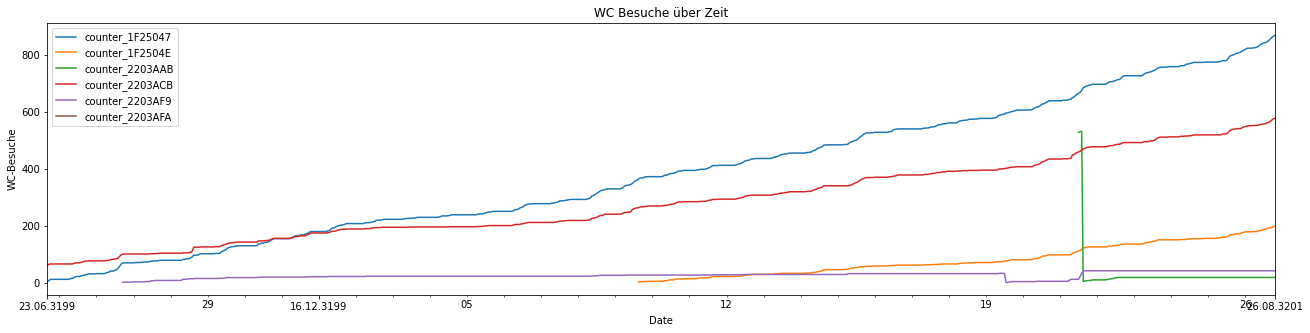

In [295]:
ax = message_data_wide[get_sub_columns(False, 'created')].plot(kind='line', x='created', figsize=(22, 5), style='-')
fds = dates.date2num(dts) # converted

ax.set_title('WC Besuche über Zeit')
ax.set_xlabel('Date')
ax.set_ylabel('WC-Besuche')

ax.xaxis.set_major_formatter(dates.DateFormatter("%d.%m.%Y"))

## Differential data over time

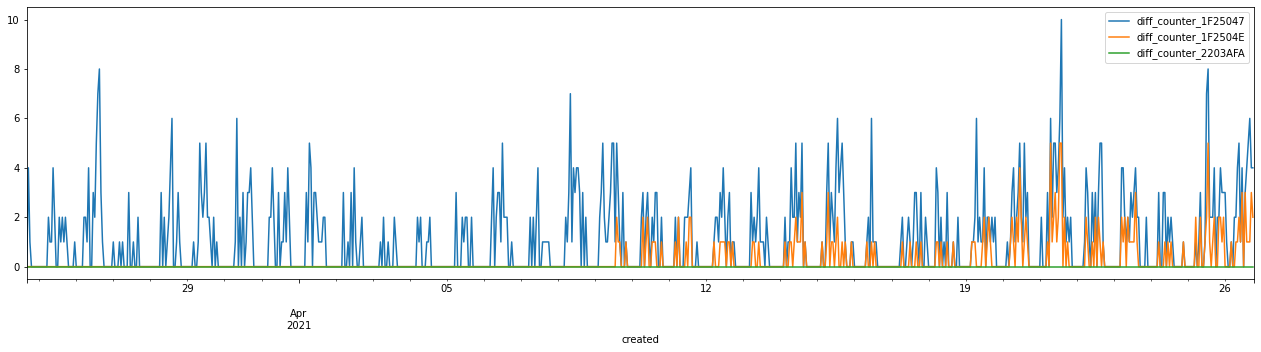

In [192]:

ax = message_data_wide[get_sub_columns(True, 'created')].plot(kind = 'line', x='created', figsize=(22, 5))
# ax.set_ylim([0, 20])

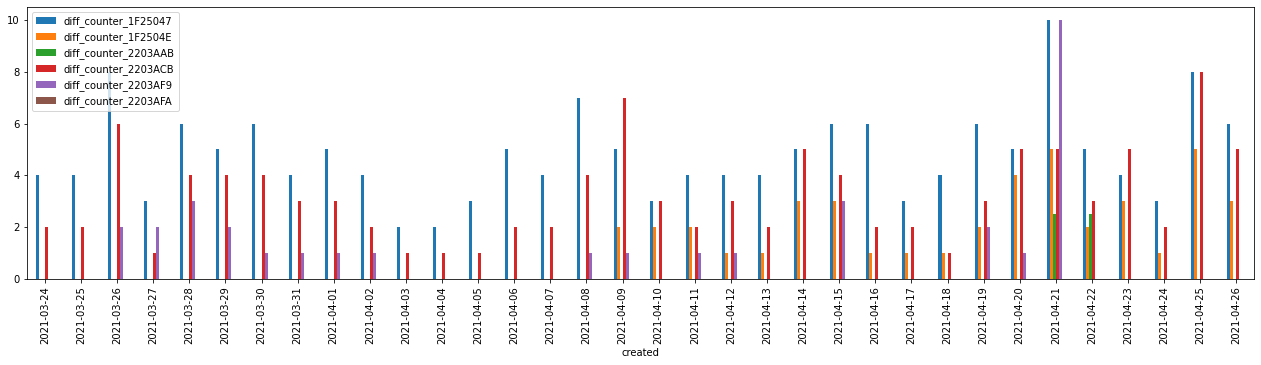

In [270]:

ax = message_data_days[get_sub_columns(True, 'created')].plot(kind = 'bar', x='created', figsize=(22, 5))

# ax.xaxis.set_major_formatter(dates.DateFormatter("%d.%m.%Y"))

## Differential data during one day

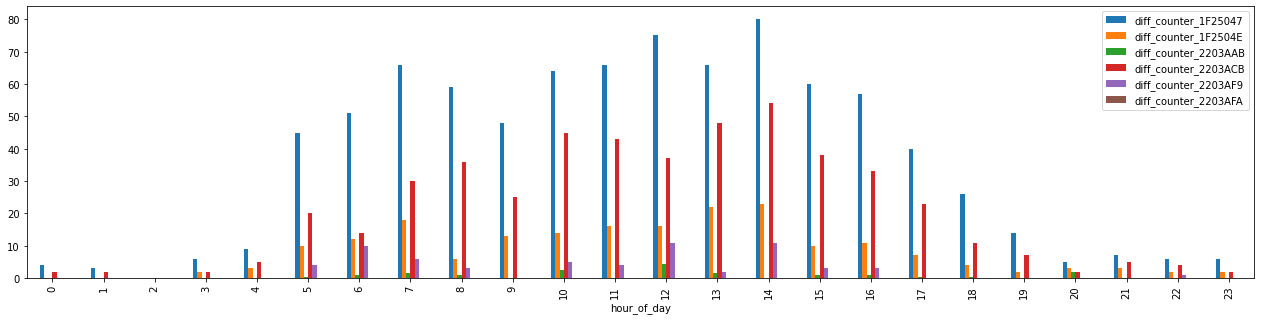

In [230]:

ax = message_data_day[get_sub_columns(True, 'hour_of_day')].plot(kind = 'bar', x='hour_of_day', figsize=(22,5))

## Differential data during one week

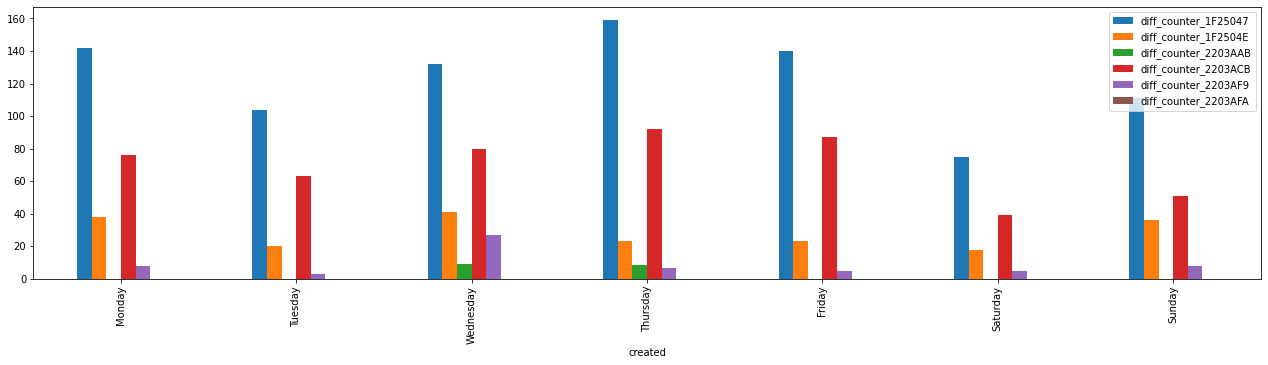

In [231]:

ax = message_data_week[get_sub_columns(True, 'created')].plot(kind = 'bar', x='created', figsize=(22,5))


---
## Spielwiese

<AxesSubplot:xlabel='created'>

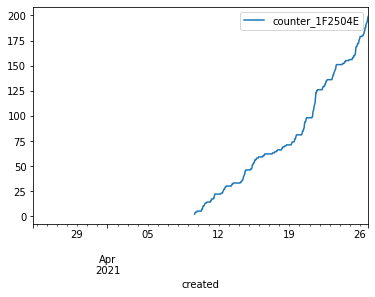

In [124]:
message_data_wide[['created', 'counter_1F2504E']].plot(x='created')

## google drive api (testing still)

In [125]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [126]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=491460359726-lj3ilu22ir8ckqnjefot5gs99vmig1d2.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [127]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')
    print(file1)

unsupported file
GoogleDriveFile({'kind': 'drive#file', 'id': '1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'etag': '"MTYxNjc3NDQ0MTgxNA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'alternateLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/edit?usp=drivesdk', 'embedLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/preview?ouid=115354251365952521942', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.document', 'thumbnailLink': 'https://docs.google.com/feeds/vt?gd=true&id=1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA&v=1&s=AMedNnoAAAAAYIcyAy0ywzeNNItP3aQebo1Epias2bUV&sz=s220', 'title': 'Unbenanntes Dokument', 'mimeType': 'application/vnd.google-apps.document', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'creat

In [128]:
print(fileCons)

[b'{\n "error": {\n  "errors": [\n   {\n    "domain": "usageLimits",\n    "reason": "dailyLimitExceededUnreg",\n    "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup.",\n    "extendedHelp": "https://code.google.com/apis/console"\n   }\n  ],\n  "code": 403,\n  "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup."\n }\n}\n']


### Jira rest api

In [129]:
import requests
import json
import base64

# Base encode email and api token
cred =  "Basic " + base64.b64encode(b'pascal.berger@students.fhnw.ch:sSrxfdz6DTjt1Sk0C2Wz6071').decode("utf-8") 

# Set header parameters
headers = {
   "Accept": "application/json",
   "Content-Type": "application/json",
   "Authorization" : cred
}
# Enter your project key here
projectKey = "SERVICE"

# Update your site url 
site_url = "https://kompotoi.atlassian.net/rest/api/3"

### Access issues

In [130]:
url = f"{site_url}/search?jql=project={projectKey}"

# Send request and get response
response = requests.request("GET", url, headers=headers)

# Decode Json string to Python
json_data = json.loads(response.text)

# Display issues
# json_data["issues"]

for item in json_data["issues"]:

    print(item["id"] + "\t" + item["key"] + "\t" +
        item["fields"]["issuetype"]["name"] + "\t" +
        item["fields"]["created"]+ "\t" +
        item["fields"]["creator"]["displayName"] + "\t" +
        item["fields"]["status"]["name"] + "\t" +
        item["fields"]["summary"] + "\t" 
        )

    # print(item["fields"]["status"]["name"])

10003	SERVICE-4	Bug	2021-04-26T18:35:38.293+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10002	SERVICE-3	Bug	2021-04-26T09:21:11.915+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10001	SERVICE-2	Bug	2021-04-24T16:31:02.978+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10000	SERVICE-1	Story	2021-04-24T16:09:04.555+0200	Pascal Berger (s)	Backlog	Test issue	


#### Create issue

In [131]:
url = f"{site_url}/issue"

json_content = \
'''
{
    "fields": {
       "project":
       {
          "key": "''' + projectKey + '''"
       },
       "summary": "REST ye merry gentlemen.",
       "description": {
          "type": "doc",
          "version": 1,
          "content": [
            {
              "type": "paragraph",
              "content": [
                {
                  "type": "text",
                  "text": "description"
                }
              ]
            }
          ]
        },
       "issuetype": {
          "name": "Bug"
       }
   }
}
'''
# json_content

# Send request and get response
response = requests.request("POST", url, headers=headers, data=json_content)

# Decode Json string to Python
json_data = json.loads(response.text)
json_data
# response.textp

{'id': '10004',
 'key': 'SERVICE-5',
 'self': 'https://kompotoi.atlassian.net/rest/api/3/issue/10004'}